In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('csv_files/full_stats.csv')

In [3]:
df.drop('Unnamed: 0', axis=1 ,inplace=True)

In [4]:
df.head()

,NAME,COLLEGE,YEAR,QBR,PAA,PLAYS,EPA,PASS,RUN,QBR_SACK,PEN,RAW,OVERALL,OFFENSE,DEFENSE,SPECIAL,CMP,PATT,CMP%,PYDS,PAVG,PLNG,PTD,INT,TOTAL_SACKS,RTG,RATT,RYDS,RAVG,RLNG,RTD,AGE,DRAFTED
0,Pat White,BIG12,2005.0,87.5,42.1,267.0,44.3,15.9,32.3,-2.9,-1.6,83.8,77.0,76.2,69.4,46.7,65.0,114.0,57.0,828.0,7.3,50.0,8.0,5.0,5.0,132.4,131.0,952.0,7.3,76.0,7.0,19.0,1.0
1,Vince Young,BIG12,2005.0,86.1,71.5,532.0,75.0,44.5,36.2,-8.1,2.2,80.2,94.8,92.0,85.0,71.9,212.0,325.0,65.2,3036.0,9.3,75.0,26.0,10.0,13.0,163.9,155.0,1050.0,6.8,80.0,12.0,22.0,1.0
2,Brian Brohm,ACC,2005.0,81.2,48.9,385.0,49.8,56.1,1.7,-9.4,2.0,78.9,76.3,84.0,54.4,55.2,207.0,301.0,68.8,2883.0,9.6,76.0,19.0,5.0,17.0,166.7,NaN,NaN,NaN,NaN,NaN,20.0,1.0
3,Rudy Carpenter,PAC-12,2005.0,80.8,39.5,307.0,42.7,51.6,2.5,-13.1,1.2,79.2,68.1,79.0,48.2,50.1,156.0,228.0,68.4,2273.0,10.0,69.0,17.0,2.0,21.0,175.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN
4,Matt Leinart,PAC-12,2005.0,80.5,51.1,529.0,61.5,64.9,6.5,-8.8,-1.0,73.2,94.1,95.8,78.7,40.7,283.0,431.0,65.7,3815.0,8.9,67.0,28.0,8.0,17.0,157.7,NaN,NaN,NaN,NaN,NaN,22.0,1.0


# QBR and College

In [5]:
df.loc[df['QBR'] >=90, 'GRADE'] = '90+'
df.loc[(df['QBR'] >= 80 ) & (df['QBR'] <90), 'GRADE'] = '80-89'
df.loc[(df['QBR'] >= 70 ) & (df['QBR'] <80), 'GRADE'] = '70-79'
df.loc[(df['QBR'] >= 60 ) & (df['QBR'] <70), 'GRADE'] = '60-69'
df.loc[(df['QBR'] >= 50 ) & (df['QBR'] <60), 'GRADE'] = '50-59'
df.loc[df['QBR'] < 50 , 'GRADE'] = '49-'

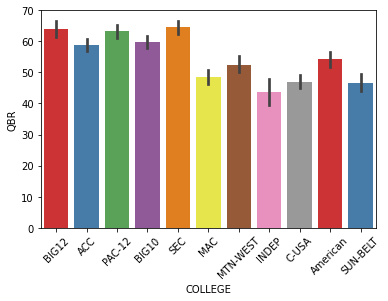

In [6]:
chart = sns.barplot(
    data=df,
    x='COLLEGE',
    y='QBR',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

# CMP% and Grade

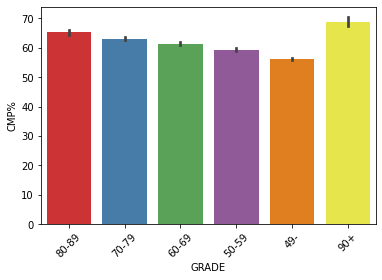

In [7]:
chart = sns.barplot(
    data=df,
    x='GRADE',
    y='CMP%',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [8]:
age = df.groupby('AGE').mean()
age.reset_index(inplace=True)
age.head()

,AGE,YEAR,QBR,PAA,PLAYS,EPA,PASS,RUN,QBR_SACK,PEN,RAW,OVERALL,OFFENSE,DEFENSE,SPECIAL,CMP,PATT,CMP%,PYDS,PAVG,PLNG,PTD,INT,TOTAL_SACKS,RTG,RATT,RYDS,RAVG,RLNG,RTD,DRAFTED
0,0.0,2012.595905,52.817457,7.952586,445.637931,24.565302,30.984375,5.148276,-13.068858,1.486746,52.585560,47.088793,45.644935,49.421767,50.101509,194.901834,324.770227,59.310356,2352.435814,7.190183,69.272923,16.266451,8.963323,20.738943,130.198706,120.002545,452.463104,3.449873,43.613232,5.938931,1.0
1,18.0,2012.764706,46.547059,3.247059,458.176471,21.252941,27.111765,6.129412,-13.152941,1.164706,47.711765,40.847059,39.611765,45.547059,46.652941,193.352941,328.352941,57.405882,2357.764706,6.864706,71.941176,16.000000,8.294118,21.470588,123.864706,148.333333,619.166667,4.050000,48.666667,6.166667,1.0
2,19.0,2010.738095,54.252381,9.733333,464.928571,26.723810,34.454762,3.788095,-13.040476,1.419048,53.216667,48.235714,48.200000,48.833333,50.459524,209.428571,346.309524,59.492857,2538.452381,7.209524,69.880952,17.738095,9.285714,20.595238,130.523810,125.583333,522.833333,4.166667,44.250000,6.500000,1.0
3,20.0,2010.686275,60.120588,19.000000,452.068627,33.933333,37.711765,7.047059,-12.248039,1.435294,57.853922,55.055882,55.394118,52.597059,50.161765,201.303922,328.960784,60.435294,2515.205882,7.546078,69.009804,19.333333,9.166667,19.519608,136.808824,132.800000,567.925000,4.115000,43.900000,8.275000,1.0
4,21.0,2010.593103,63.472414,21.408966,463.179310,36.517241,40.213793,8.115172,-13.247586,1.440690,59.773103,60.227586,59.337931,56.892414,51.708276,208.151724,340.931034,60.219310,2630.455172,7.676552,71.331034,19.620690,9.006897,20.220690,138.115862,134.800000,609.800000,4.310000,48.340000,8.120000,1.0


# Dual Threat QBR

In [9]:
df.loc[df['COLLEGE'].isin(['BIG12', 'ACC', 'PAC-12', 'BIG10', 'SEC']), 'CONFERENCE'] = 'TOP TIER'
df.loc[df['COLLEGE'].isin(['MAC', 'MTN-WEST', 'INDEP', 'C-USA', 'American', 'SUN-BELT']), 'CONFERENCE'] = 'BOTTOM TIER'

In [10]:
df.loc[df['RAVG'] >= 4, 'STYLE'] = 'Dual-Threat'
df.loc[df['RAVG'] < 4, 'STYLE'] = 'Standard'

In [11]:
df.loc[df['STYLE'] == 'Dual-Threat']

,NAME,COLLEGE,YEAR,QBR,PAA,PLAYS,EPA,PASS,RUN,QBR_SACK,PEN,RAW,OVERALL,OFFENSE,DEFENSE,SPECIAL,CMP,PATT,CMP%,PYDS,PAVG,PLNG,PTD,INT,TOTAL_SACKS,RTG,RATT,RYDS,RAVG,RLNG,RTD,AGE,DRAFTED,GRADE,CONFERENCE,STYLE
0,Pat White,BIG12,2005.0,87.5,42.1,267.0,44.3,15.9,32.3,-2.9,-1.6,83.8,77.0,76.2,69.4,46.7,65.0,114.0,57.0,828.0,7.3,50.0,8.0,5.0,5.0,132.4,131.0,952.0,7.3,76.0,7.0,19.0,1.0,80-89,TOP TIER,Dual-Threat
1,Vince Young,BIG12,2005.0,86.1,71.5,532.0,75.0,44.5,36.2,-8.1,2.2,80.2,94.8,92.0,85.0,71.9,212.0,325.0,65.2,3036.0,9.3,75.0,26.0,10.0,13.0,163.9,155.0,1050.0,6.8,80.0,12.0,22.0,1.0,80-89,TOP TIER,Dual-Threat
6,Troy Smith,BIG10,2005.0,78.8,33.7,404.0,46.8,47.0,12.9,-11.4,-1.6,70.4,86.9,73.3,83.7,74.7,149.0,237.0,62.9,2282.0,9.6,85.0,16.0,4.0,14.0,162.7,136.0,611.0,4.5,28.0,11.0,21.0,1.0,70-79,TOP TIER,Dual-Threat
8,D.J. Shockley,SEC,2005.0,75.8,30.6,435.0,44.7,43.8,8.7,-9.0,1.2,67.5,78.2,70.9,69.8,71.8,173.0,310.0,55.8,2588.0,8.3,56.0,24.0,5.0,17.0,148.3,78.0,322.0,4.1,40.0,4.0,22.0,1.0,70-79,TOP TIER,Dual-Threat
13,Brad Smith,SEC,2005.0,73.3,47.8,670.0,66.9,26.9,45.6,-10.3,4.4,67.7,54.9,60.4,51.3,36.8,237.0,399.0,59.4,2304.0,5.8,50.0,13.0,9.0,12.0,114.1,229.0,1301.0,5.7,79.0,16.0,22.0,1.0,70-79,TOP TIER,Dual-Threat
24,Reggie McNeal,SEC,2005.0,66.9,21.7,408.0,32.5,14.6,23.1,-5.7,0.6,63.5,54.2,70.2,36.7,50.0,141.0,265.0,53.2,1963.0,7.4,80.0,16.0,9.0,11.0,128.6,96.0,664.0,6.9,63.0,3.0,22.0,NaN,60-69,TOP TIER,Dual-Threat
34,Bruce Gradkowski,MAC,2005.0,61.9,37.4,431.0,47.4,38.8,15.3,-6.7,-0.1,71.1,57.7,60.1,51.5,52.3,207.0,332.0,62.3,2469.0,7.4,70.0,29.0,12.0,9.0,146.4,61.0,291.0,4.8,31.0,4.0,22.0,1.0,60-69,BOTTOM TIER,Dual-Threat
40,Michael Robinson,BIG10,2005.0,59.4,0.2,502.0,20.4,19.9,6.4,-9.3,3.5,50.1,83.7,74.0,83.4,47.0,162.0,311.0,52.1,2350.0,7.6,59.0,17.0,10.0,12.0,127.2,163.0,806.0,4.9,39.0,11.0,22.0,1.0,50-59,TOP TIER,Dual-Threat
49,Shaun Carney,MTN-WEST,2005.0,56.1,11.8,351.0,26.5,29.5,2.1,-8.6,3.5,58.7,40.2,63.8,25.1,35.4,95.0,148.0,64.2,1393.0,9.4,61.0,7.0,7.0,13.0,149.4,170.0,710.0,4.2,61.0,11.0,0.0,NaN,50-59,BOTTOM TIER,Dual-Threat
53,Maurice Avery,American,2005.0,52.3,0.8,257.0,11.5,14.6,0.3,-3.5,0.0,50.8,49.4,54.6,39.1,65.9,67.0,118.0,56.8,894.0,7.6,66.0,5.0,4.0,6.0,127.6,132.0,570.0,4.3,30.0,5.0,0.0,NaN,50-59,BOTTOM TIER,Dual-Threat


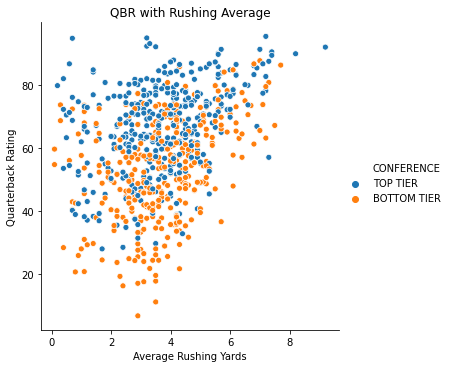

In [23]:
sns.relplot(x='RAVG', y='QBR', hue='CONFERENCE', data=df)
plt.title('QBR with Rushing Average')
plt.xlabel('Average Rushing Yards')
plt.ylabel('Quarterback Rating');

# Offense and Defense Rating

In [13]:
dual = df[df['STYLE'] == 'Dual-Threat']

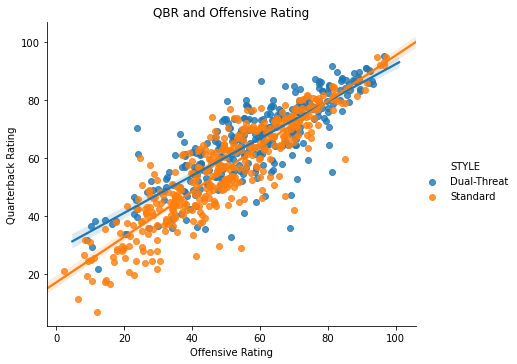

In [14]:
sns.pairplot(df, x_vars=['OFFENSE'], y_vars=['QBR'],
             hue="STYLE",height=5, aspect=1.2, kind="reg");
plt.title('QBR and Offensive Rating')
plt.xlabel('Offensive Rating')
plt.ylabel('Quarterback Rating');

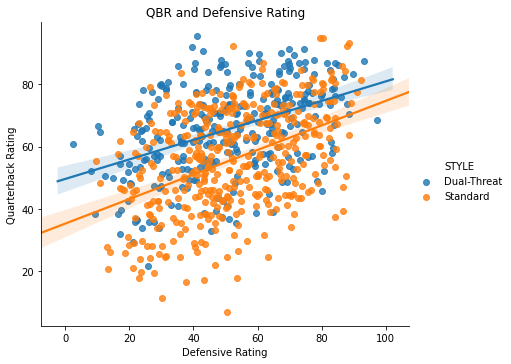

In [15]:
sns.pairplot(df, x_vars=['DEFENSE'], y_vars=['QBR'],
             hue="STYLE",height=5, aspect=1.2, kind="reg");
plt.title('QBR and Defensive Rating')
plt.xlabel('Defensive Rating')
plt.ylabel('Quarterback Rating');

# Dual Threat and Age

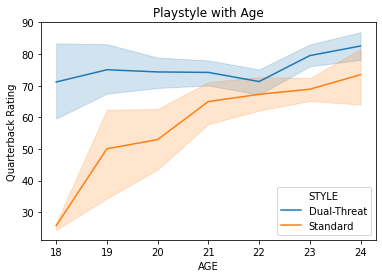

In [21]:
sns.lineplot(x='AGE', y='QBR', hue='STYLE', data=df[(df['AGE'] < 35) & (df['AGE'] > 0)])
plt.title('Playstyle with Age')
plt.ylabel('Quarterback Rating');

# QBR Based on Conferance and Age

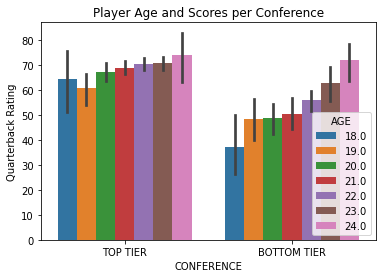

In [19]:
sns.barplot(x='CONFERENCE', y='QBR', hue='AGE', data=df[(df['AGE'] < 25) & (df['AGE'] > 0)])
plt.title('Player Age and Scores per Conference')
plt.ylabel('Quarterback Rating');